#Kristina Jasaitytė

In [1]:
import pandas as pd
import numpy as np
import mysql.connector as CN
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
airbnb = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\Kristina\AppData\Local\Temp\ipykernel_12536\762493384.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
airbnb_n = airbnb

In [4]:
airbnb_n["country"] = airbnb_n["country"].fillna("United States")
airbnb_n["country code"] = airbnb_n["country code"].fillna("US")
airbnb_n["minimum nights"] = airbnb_n["minimum nights"].fillna(1)
airbnb_n["number of reviews"] = airbnb_n["number of reviews"].fillna(0)         # NaN -> 0
airbnb_n["reviews per month"] = airbnb_n["reviews per month"].fillna(0)
airbnb_n["calculated host listings count"] = airbnb_n["calculated host listings count"].fillna(0)
airbnb_n["service fee"] = airbnb_n["service fee"].fillna(0)
airbnb_n["minimum nights"] = airbnb_n["minimum nights"].replace([-1223, -365,-200, -125, -12, -10, -5, -3, -2, -1], 1)
airbnb_n["neighbourhood group"] = airbnb_n["neighbourhood group"].replace("brookln", "Brooklyn")                   
airbnb_n["neighbourhood group"] = airbnb_n["neighbourhood group"].replace("manhatan", "Manhattan")
airbnb_n['host_identity_verified'] = np.where(airbnb_n['host_identity_verified'].isnull(), 'unknown', airbnb_n['host_identity_verified'])
airbnb_n['availability 365'] = np.where(airbnb_n['availability 365']<0, airbnb_n['availability 365']*(-1), airbnb_n['availability 365'])
airbnb_n['availability 365'] = np.where(airbnb_n['availability 365']>365, 365, airbnb_n['availability 365'])
airbnb_n= airbnb_n.dropna(subset=['price'])             # nenagrinėjame, jei "price" yra NaN

airbnb_n= airbnb_n.dropna(subset=['neighbourhood group'])             # nenagrinėjame, jei "neighbourhood group" yra NaN
airbnb_n= airbnb_n.dropna(subset=['review rate number'])             # nenagrinėjame, jei "neighbourhood group" yra NaN

In [5]:
airbnb_nv = airbnb_n[(airbnb_n['minimum nights']<=180) & (airbnb_n['minimum nights']>0) & (airbnb_n['availability 365']>=0)]

In [6]:
nights_num = airbnb_nv['minimum nights'].value_counts().sort_index(ascending=True) 

In [144]:
# airbnb_nv['minimum nights'].value_counts().sort_values(ascending=False).head(10)  # 10 didžiausių reikšmių
# airbnb_nv['price'].value_counts().sort_index(ascending=True)    # kiek kokių kainų

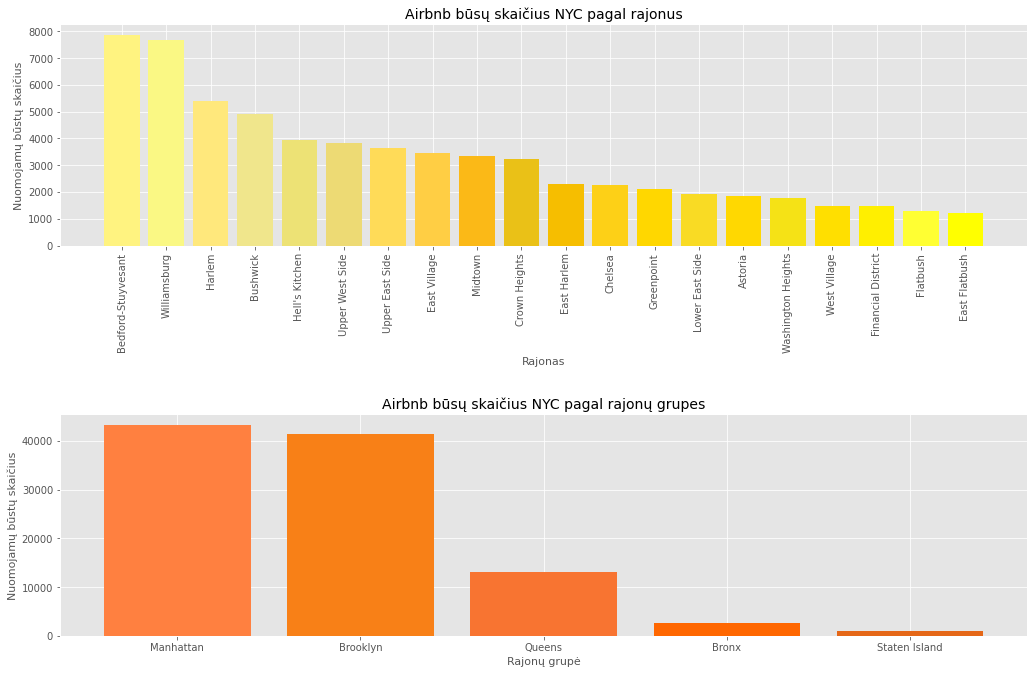

In [7]:
nbhd_count = airbnb_nv['neighbourhood'].value_counts().head(20)
xticklabels = nbhd_count.index

fig, graf = plt.subplots(2,1)
yellows = ['#FFF380','#FAF884','#FFE87C','#F0E68C','#EDE275','#EDDA74','#FFDB58','#FFCE44','#FBB917',
'#EAC117','#F6BE00','#FDD017','#FFD700','#F9DB24','#FFD801','#F5E216','#FFDF00','#FFEF00','#FFFF33', '#FFFF00']
graf[0].bar(nbhd_count.index, nbhd_count.values, color = yellows)
graf[0].set_xticks(nbhd_count.index)
graf[0].set_xticklabels(xticklabels, rotation = 90)
graf[0].set_xlabel("Rajonas", fontsize=11)
graf[0].set_ylabel('Nuomojamų būstų skaičius', fontsize=11)
graf[0].set_title('Airbnb būsų skaičius NYC pagal rajonus', fontsize=14)

nbhd_count = airbnb_nv['neighbourhood group'].value_counts().head(20)
xticklabels = nbhd_count.index
oranges = ['#FF8040', '#F88017', '#F87431', '#FF6700', '#E56717', '#D2691E']
graf[1].bar(nbhd_count.index, nbhd_count.values, color = oranges)
graf[1].set_xticks(nbhd_count.index)
graf[1].set_xticklabels(xticklabels)
graf[1].set_xlabel("Rajonų grupė", fontsize=11)
graf[1].set_ylabel('Nuomojamų būstų skaičius', fontsize=11)
graf[1].set_title('Airbnb būsų skaičius NYC pagal rajonų grupes', fontsize=14)
fig.set_size_inches(15,10)
fig.tight_layout(pad=3)

plt.show()

In [8]:
prices = airbnb_nv['price'].value_counts().sort_index(ascending=True)

In [9]:
vid = round(airbnb_nv['price'].values.mean(),2)
median = round(np.median(airbnb_nv['price'].values),2)
# print("vidurkis", vid, ", mediana", median)

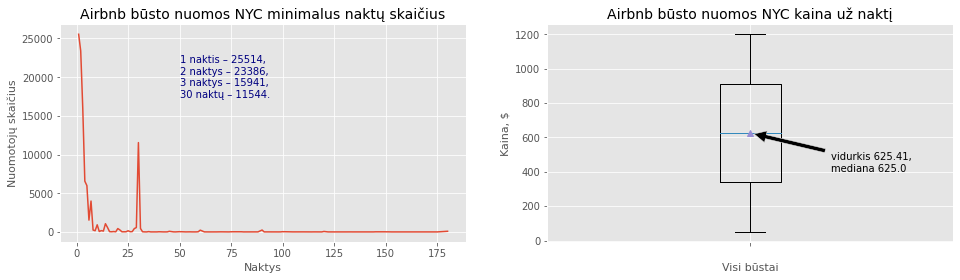

In [10]:
fig, graf = plt.subplots(1,2)
graf[0].plot(nights_num.index, nights_num.values)
graf[0].set_xlabel("Naktys", fontsize=11)
graf[0].set_ylabel("Nuomotojų skaičius", fontsize=11)
graf[0].set_title("Airbnb būsto nuomos NYC minimalus naktų skaičius", fontsize=14)
graf[0].text(50, 20000, '1 naktis – 25514,\n2 naktys – 23386,\n3 naktys – 15941,\n30 naktų – 11544.',
horizontalalignment='left', verticalalignment='center', color = 'navy')


graf[1].boxplot(airbnb_nv['price'].values, showmeans=True, showfliers = False)
graf[1].set_title("Airbnb būsto nuomos NYC kaina už naktį", fontsize=14)
fig.set_size_inches(16,4)
plt.annotate('vidurkis %.2f,\nmediana %.1f'%(vid, median), xy=(1, vid), xytext=(1.2, 400),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
graf[1].set_ylabel("Kaina, $", fontsize=11)
graf[1].set_xlabel("Visi būstai", fontsize=11)
plt.xticks(color='w')

plt.show()

In [11]:
vid_v = round(airbnb_nv[airbnb_nv['host_identity_verified']=="verified"]['price'].values.mean(),2)
median_v = round(np.median(airbnb_nv[airbnb_nv['host_identity_verified']=="verified"]['price'].values),2)
vid_uc = round(airbnb_nv[airbnb_nv['host_identity_verified']=="unconfirmed"]['price'].values.mean(),2)
median_uc = round(np.median(airbnb_nv[airbnb_nv['host_identity_verified']=="unconfirmed"]['price'].values),2)
vid_un = round(airbnb_nv[airbnb_nv['host_identity_verified']=="unknown"]['price'].values.mean(),2)
median_un = round(np.median(airbnb_nv[airbnb_nv['host_identity_verified']=="unknown"]['price'].values),2)

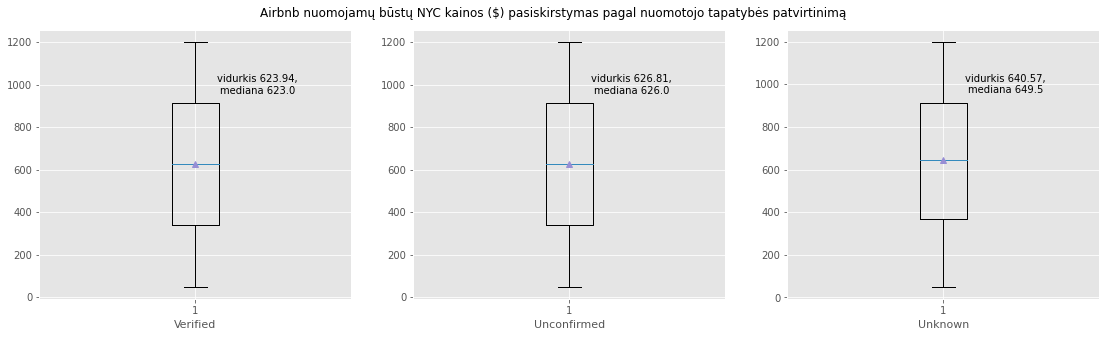

In [12]:
fig, gr = plt.subplots(1,3)
forms=['verified', 'unconfirmed', 'unknown']
i=0
for vald in forms:
    gr[i].boxplot(
        airbnb_nv[airbnb_nv['host_identity_verified']==vald]['price'].value_counts().sort_index(ascending=True).index,
        showmeans=True, showfliers=False)
    i=i+1
    
gr[0].set_xlabel("Verified", fontsize=11)
gr[0].text(1.2, 1000, 'vidurkis %.2f,\nmediana %.1f'%(vid_v, median_v), horizontalalignment='center', verticalalignment='center')
gr[1].set_xlabel("Unconfirmed", fontsize=11)
gr[1].text(1.2, 1000, 'vidurkis %.2f,\nmediana %.1f'%(vid_uc, median_uc), horizontalalignment='center', verticalalignment='center')
gr[2].set_xlabel("Unknown", fontsize=11)
gr[2].text(1.2, 1000, 'vidurkis %.2f,\nmediana %.1f'%(vid_un, median_un), horizontalalignment='center', verticalalignment='center')

fig.set_size_inches(16,5)
fig.tight_layout(pad=3)
fig.suptitle('Airbnb nuomojamų būstų NYC kainos ($) pasiskirstymas pagal nuomotojo tapatybės patvirtinimą')
plt.show()

In [13]:
airbnb_nv['availability_grp'] = np.where(airbnb_nv['availability 365']<=90, '0-3 mėn.',
np.where((airbnb_nv['availability 365'] > 9) & (airbnb_nv['availability 365'] <= 180), '3-6 mėn.',
np.where((airbnb_nv['availability 365'] > 180) & (airbnb_nv['availability 365'] <= 270), '6-9 mėn.', '9-12 mėn.')))

C:\Users\Kristina\AppData\Local\Temp\ipykernel_12536\3989793510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_nv['availability_grp'] = np.where(airbnb_nv['availability 365']<=90, '0-3 mėn.',


In [14]:
avail_grp = airbnb_nv['availability_grp'].value_counts().sort_index(ascending=True)
avail_grp_pav = avail_grp.index   # iš pirmo st. - grupė
avail_grp_k = avail_grp.values  # kiek grupėje yra elementų
# print(avail_grp_k)

In [15]:
reitingai = airbnb_nv['review rate number'].value_counts().sort_index(ascending=True) 
reit_pav = reitingai.index   # iš pirmo st. - reitingas nuo 1 iki 5
reit_k = reitingai.values  # kiek grupėje yra elementų

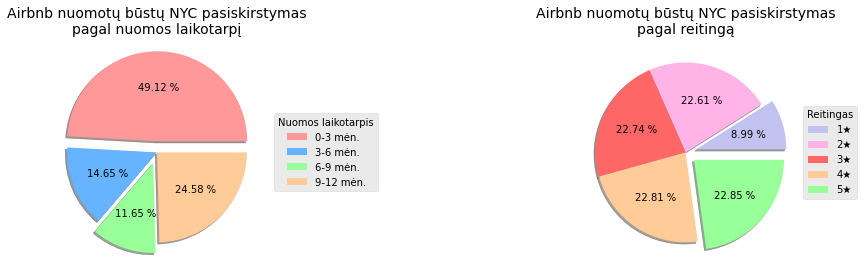

In [16]:
fig, gr = plt.subplots(1,2)
x = ['0-3 mėn.', '3-6 mėn.', '6-9 mėn.', '9-12 mėn.']
explode = [0.125,0,0.125,0] # per kiek atitraukiame dalį skritulio

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
gr[0].pie(avail_grp_k, explode=explode, shadow=True, autopct='%.2f %%', colors = colors)
gr[0].set_title("Airbnb nuomotų būstų NYC pasiskirstymas\npagal nuomos laikotarpį", fontsize=14)
gr[0].legend(x,
          title="Nuomos laikotarpis",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# x = np.arange(1, len(reit_pav)+1)
x = ['1★', '2★','3★','4★', '5★']
explode = [0.125,0,0,0,0.125] # per kiek atitraukiame dalį skritulio
colors2 = ['#c2c2f0','#ffb3e6', '#ff6666', '#ffcc99', '#99ff99', '#66b3ff']

gr[1].pie(reit_k, explode=explode, shadow=True, autopct='%.2f %%', colors = colors2)
gr[1].set_title("Airbnb nuomotų būstų NYC pasiskirstymas\npagal reitingą", fontsize=14)
gr[1].legend(x,
          title="Reitingas",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

fig.set_size_inches(16,4)
fig.tight_layout(pad=1.5)

plt.show()

In [17]:
airbnb_nv['price_grp'] = np.where(airbnb_nv['price']<=340, '0-25 %',
np.where((airbnb_nv['price'] > 340) & (airbnb_nv['price'] <= 625), '25-50 %',
np.where((airbnb_nv['price'] > 625) & (airbnb_nv['price'] <= 913), '50-75 %', '75-100 %')))

C:\Users\Kristina\AppData\Local\Temp\ipykernel_12536\437587838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_nv['price_grp'] = np.where(airbnb_nv['price']<=340, '0-25 %',


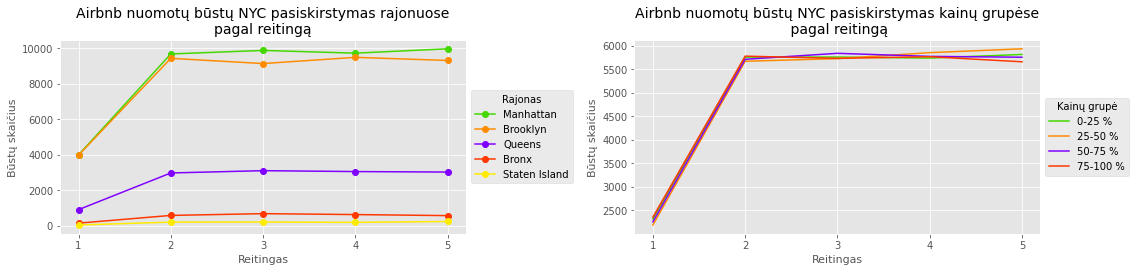

In [18]:
nbhd = airbnb_nv['neighbourhood group'].value_counts()      # kiek grupėje
colors2 = ['#44d800', '#ff8c00', '#7f00ff', '#ff3800', '#ffeb00', '#ff2b67', '#af0dd3', '#00ffce', '#a7fc00', '#ff1dce']
x = np.arange(1, len(reit_pav)+1)

fig, gr = plt.subplots(1,2)

k=0
for i in nbhd.index:
    nbh = airbnb_nv[airbnb_nv['neighbourhood group'] == i]['review rate number'].value_counts()    # lokalus kintamasis
    nbh.sort_index(ascending=True, inplace=True)    # inplace = True užfiksuoja rūšiavimą duomenyse
    gr[0].plot(nbh.index, nbh.values, label=i, color=colors2[k], marker='o')
    k=k+1
gr[0].set_xticks(x)
gr[0].legend(title="Rajonas", loc='center left', bbox_to_anchor=(1, 0.5))
gr[0].set_title("Airbnb nuomotų būstų NYC pasiskirstymas rajonuose\npagal reitingą", fontsize=14)
gr[0].set_xlabel("Reitingas", fontsize=11)
gr[0].set_ylabel("Būstų skaičius", fontsize=11)


prcg = airbnb_nv['price_grp'].value_counts().sort_index(ascending=True)      # kiek kiekvienoje grupėje
colors2 = ['#44d800', '#ff8c00', '#7f00ff', '#ff3800', '#ffeb00', '#ff2b67', '#af0dd3', '#00ffce', '#a7fc00', '#ff1dce']
x = np.arange(1, len(reit_pav)+1)

k=0
for i in prcg.index:
    prc = airbnb_nv[airbnb_nv['price_grp'] == i]['review rate number'].value_counts()    # lokalus kintamasis
    prc.sort_index(ascending=True, inplace=True)    # inplace = True užfiksuoja rūšiavimą duomenyse
    gr[1].plot(prc.index, prc.values, label=i, color=colors2[k])
    k=k+1
gr[1].set_xticks(x)
gr[1].legend(title="Kainų grupė", loc='center left', bbox_to_anchor=(1, 0.5))
gr[1].set_title("Airbnb nuomotų būstų NYC pasiskirstymas kainų grupėse\n pagal reitingą", fontsize=14)
gr[1].set_xlabel("Reitingas", fontsize=11)
gr[1].set_ylabel("Būstų skaičius", fontsize=11)
fig.set_size_inches(16,4)
fig.tight_layout(pad=1.5)

plt.show()

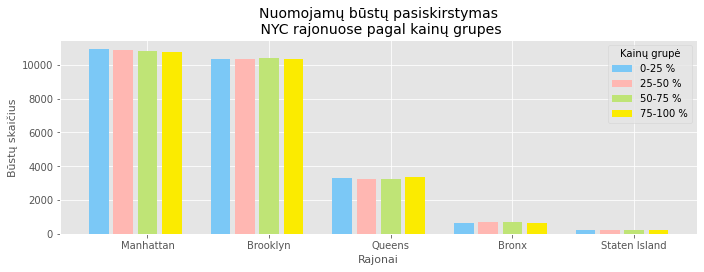

In [19]:
prg1= airbnb_nv[airbnb_nv['price_grp'] == '0-25 %']['neighbourhood group']
prg2= airbnb_nv[airbnb_nv['price_grp'] == '25-50 %']['neighbourhood group']
prg3= airbnb_nv[airbnb_nv['price_grp'] == '50-75 %']['neighbourhood group']
prg4= airbnb_nv[airbnb_nv['price_grp'] == '75-100 %']['neighbourhood group']

fig, gr = plt.subplots()
gr.bar([1, 6, 11, 16, 21], prg1.value_counts(), label = '0-25 %', color = '#7bc8f6')
gr.bar([2, 7, 12, 17, 22], prg2.value_counts(), label = '25-50 %', color = '#FFB7B2')
gr.bar([3, 8, 13, 18, 23], prg3.value_counts(), label = '50-75 %', color = '#BFE476')
gr.bar([4, 9, 14, 19, 24], prg4.value_counts(), label = '75-100 %', color = '#fbeb00')
gr.legend(title="Kainų grupė")
gr.set_xticks([3, 8, 13, 18, 23])
gr.set_xticklabels(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])
gr.set_title("Nuomojamų būstų pasiskirstymas\n NYC rajonuose pagal kainų grupes", fontsize=14)
gr.set_xlabel("Rajonai", fontsize=11)
gr.set_ylabel("Būstų skaičius", fontsize=11)
fig.set_size_inches(10,4)
fig.tight_layout(pad=1.5)

plt.show()

In [20]:
roomtp = airbnb_nv['room type'].value_counts().index     # grupės
blues = ['#1589FF', '#1974D2', '#1F45FC', '#0041C2', '#0000A5', '#151B8D']

vid_kaina_eh = airbnb_nv[(airbnb_nv['room type'] == 'Entire home/apt')]['price'].values.mean()
vid_kaina_pr = airbnb_nv[(airbnb_nv['room type'] == 'Private room')]['price'].values.mean()
vid_kaina_sh = airbnb_nv[(airbnb_nv['room type'] == 'Shared room')]['price'].values.mean()
vid_kaina_hr = airbnb_nv[(airbnb_nv['room type'] == 'Hotel room')]['price'].values.mean()

fig, gr = plt.subplots()
d = gr.bar(roomtp, [vid_kaina_eh, vid_kaina_pr, vid_kaina_sh, vid_kaina_hr], color=blues)
gr.bar_label(d,fmt = '%.2f', fontsize=8)
gr.set_title("Vidutinė Airbnb būsto NYC nuomos kaina pagal kambario tipą", fontsize=14)
gr.set_xlabel("Būsto tipas", fontsize=11)
gr.set_ylabel("Vidutinė kaina, $", fontsize=11)
fig.set_size_inches(10,5)
fig.tight_layout(pad=1.5)

plt.show()

----------------------------------------UPDATE---------------------------------------

In [21]:
a = airbnb_nv['price'].value_counts()
b = airbnb_nv['service fee'].value_counts()
pricing=pd.DataFrame(a,b)
pricing.reset_index(inplace = True, drop = True)
pricing['service fee'] = b

Text(0, 0.5, 'Dažnis')

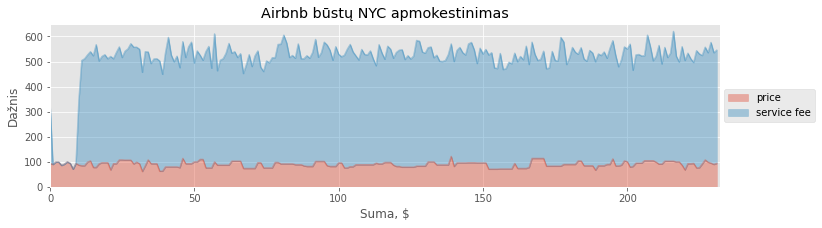

In [22]:
ax = pricing.plot.area(alpha=0.4, figsize = (12,3))
ax.set_title('Airbnb būstų NYC apmokestinimas')
ax.set_xlim(0,232)
ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5))
ax.set_xlabel('Suma, $')
ax.set_ylabel('Dažnis')

In [161]:
# from plotnine import *

In [162]:
# airbnb_nv['price'].isna().unique()

In [163]:
# ggplot(airbnb_nv, aes(x = airbnb_nv['room type'], y=airbnb_nv['price'], size='review rate number', color = airbnb_nv['neighbourhood group']))+ geom_point()


In [23]:
import seaborn as sns

# plt.figure(figsize=(12,8))
# sns.scatterplot(x='price',y='long',data=airbnb_nv)

<AxesSubplot:>

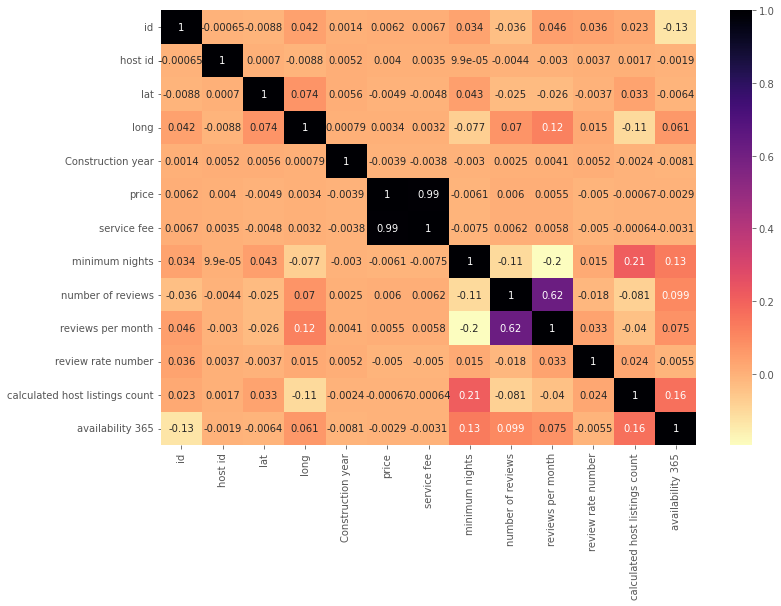

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(airbnb_nv.corr().transpose(), cmap = 'magma_r', annot=True)

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=airbnb_nv, hue='neighbourhood group', palette = 'colorblind', edgecolor='#ececec')
plt.title('Airbnb nuomojamų būstų pasiskirstymas NYC pagal lokaciją')

Text(0.5, 1.0, 'Airbnb nuomojamų būstų pasiskirstymas NYC pagal lokaciją')

In [26]:
import matplotlib.image as mpimg 
img = mpimg.imread("NYC.png")
# img.shape

In [27]:
plt.rcParams['figure.figsize'] = (8, 8)

t = airbnb_nv['lat'].max()
b = airbnb_nv['lat'].min()
r= airbnb_nv['long'].max()
l =airbnb_nv['long'].min()
# print('t=',t, 'b=',b, 'l=',l, 'r=',r)


fig, ax = plt.subplots()
ax.imshow(img, extent=[l, r, b, t], aspect='auto')
sns.scatterplot(x='long',y='lat',data=airbnb_nv,hue='price', palette='brg',edgecolor=None,alpha=0.2, zorder=1, s=6)
plt.title('Airbnb nuomojamų būstų kainų pasiskirstymas NYC pagal lokaciją')
plt.xlim(l, r)
plt.ylim(b, t)


(40.49979, 40.91697)